In [1]:
#!jt -t onedork -fs 90 -altout -tfs 14 -nfs 115 -cellw 90% -T -cursc r -cursw 5 -dfs 8 -N

In [1]:
import warnings
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from scipy.stats import spearmanr
from sklearn.model_selection import cross_val_score, cross_val_predict, validation_curve, learning_curve, GridSearchCV
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from yellowbrick.model_selection import ValidationCurve, LearningCurve

In [2]:
sns.set(style="darkgrid", color_codes=True)

In [3]:
%matplotlib inline
plt.style.use('dark_background')
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')

In [5]:
house_sales = pd.read_csv('kc_house_data.csv')
house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
#house_sales['date'] = pd.to_datetime(house_sales.date).dt.strftime('%Y%m')
#house_sales['date'] = house_sales['date'].astype(int)
house_sales = house_sales.drop(['date','id'], axis=1)
house_sales.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, explained_variance_score

In [8]:
X = house_sales.drop('price', axis=1)
y = np.log(house_sales.price)
#y = house_sales.price

In [9]:
house_sales.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
len(house_sales.columns)

19

In [11]:
categorical_columns = ['grade', 'waterfront', 'view', 'condition']

numerical_columns = ['bedrooms', 'bathrooms', 'sqft_living',
                    'sqft_lot', 'floors', 'yr_renovated',
                    'sqft_above', 'sqft_basement', 'yr_built', 'zipcode',
                    'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [12]:
X = X[categorical_columns + numerical_columns]
len(X.columns)

18

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=804)

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

In [16]:
from sklearn.preprocessing import QuantileTransformer

In [17]:
categorical_pipe = Pipeline([
    #('imputer', SimpleImputer(strategy='most_frequent'))#,
    ('imputer', IterativeImputer(random_state=42))
    #('onehot', OneHotEncoder(categories='auto', handle_unknown='ignore'))
])

numerical_pipe = Pipeline([
    ('qt', QuantileTransformer(n_quantiles=730, output_distribution='normal', random_state=42)),
    ('imputer', IterativeImputer(random_state=42))
])

preprocessing = ColumnTransformer(
    [('cat', categorical_pipe, categorical_columns),
     ('num', numerical_pipe, numerical_columns)])

    
rf = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', RandomForestRegressor(random_state=42, criterion='friedman_mse',
                                        min_samples_split = 8,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=4, 
                                        n_estimators=30,
                                        min_weight_fraction_leaf=0.0))
                                        ])

rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   IterativeImputer(add_indicator=False,
                                                                                    estimator=None,
                                                                                    imputation_order='ascending',
                                                                                    initial_strategy='mean',
                                                                                    max_iter=10,
                               

In [18]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 0.955
RF test accuracy: 0.881


In [19]:
#y_pred = cross_val_predict(rf, X_test, y_test, cv=5)
y_pred = cross_val_predict(rf, X, y, cv=5)

In [20]:
#error = (y_test - y_pred).rename('Prediction Errors')
error = (y - y_pred).rename('Prediction Errors')

In [21]:
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             mean_squared_log_error, 
                             median_absolute_error, 
                             explained_variance_score, 
                             r2_score)

In [22]:
scores = dict(
    rmse=np.sqrt(mean_squared_error(y_true=y, y_pred=y_pred)),
    rmsle=np.sqrt(mean_squared_log_error(y_true=y, y_pred=y_pred)),
    mean_ae=mean_absolute_error(y_true=y, y_pred=y_pred),
    median_ae=median_absolute_error(y_true=y, y_pred=y_pred),
    r2score=explained_variance_score(y_true=y, y_pred=y_pred)
)

In [23]:
feature_names = X.columns

In [24]:
preds = pd.concat([pd.Series(y), pd.Series(y_pred)], axis=1)
preds.columns = ['price', 'predictions']
preds.head()

,price,predictions
0,12.309982,12.454972
1,13.195614,13.022231
2,12.100712,12.545198
3,13.311329,13.137942
4,13.142166,13.168750


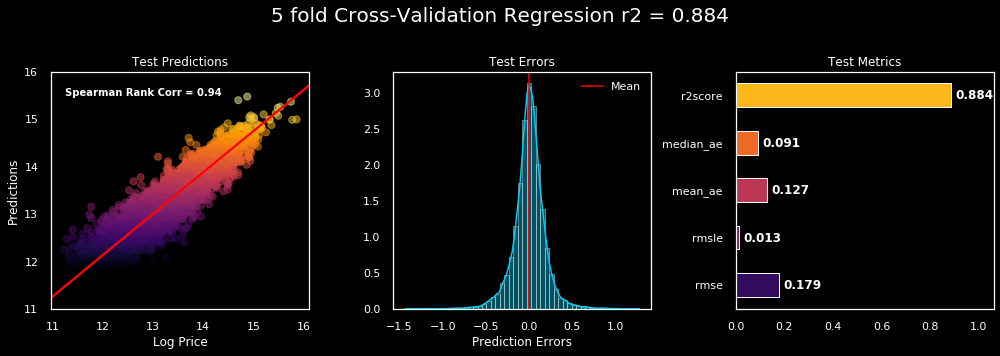

In [25]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 5))
colors = sns.color_palette('inferno', 5)
axes[0].scatter(preds.price, preds.predictions, c=preds.predictions, s=50, cmap="inferno", alpha=0.5)
j = sns.regplot(preds.price, preds.predictions, data=preds, scatter=False, color="red", ax=axes[0])
j.annotate(f'Spearman Rank Corr = {round(spearmanr(y, y_pred)[0],2)}', xy=(11.25,15.5), size=10, fontweight='bold')
axes[0].grid(False)
axes[0].set_xlabel('Log Price')
axes[0].set_ylabel('Predictions')
axes[0].set_ylim(11, 16)
axes[0].set_title('Test Predictions')
sns.distplot(error, ax=axes[1], color='#00cef7')
axes[1].axvline(error.mean(),color = 'red', lw=1.5, label='Mean')
axes[1].legend(loc='Best')
axes[1].set_title('Test Errors')
axes[1].grid(False)
pd.Series(scores).plot.barh(ax=axes[2], title='Test Metrics',colors=colors)
axes[2].grid(False)
for i, v in enumerate(pd.Series(scores).values):
        axes[2].text(v + 0.175, i, str(round(v,3)), color='white', fontweight='bold', fontsize=12, va='center', ha = 'right')
axes[2].margins(x=0.2)
cv = float(format(cross_val_score(rf, X, y, cv=5).mean(),'.3f'))
fig.suptitle(f'5 fold Cross-Validation Regression r2 = {cv}', fontsize=20)
fig.tight_layout()
plt.grid(False)
plt.subplots_adjust(top=.8)
plt.show();

In [26]:
rf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocess', 'regressor', 'preprocess__n_jobs', 'preprocess__remainder', 'preprocess__sparse_threshold', 'preprocess__transformer_weights', 'preprocess__transformers', 'preprocess__verbose', 'preprocess__cat', 'preprocess__num', 'preprocess__cat__memory', 'preprocess__cat__steps', 'preprocess__cat__verbose', 'preprocess__cat__imputer', 'preprocess__cat__imputer__add_indicator', 'preprocess__cat__imputer__estimator', 'preprocess__cat__imputer__imputation_order', 'preprocess__cat__imputer__initial_strategy', 'preprocess__cat__imputer__max_iter', 'preprocess__cat__imputer__max_value', 'preprocess__cat__imputer__min_value', 'preprocess__cat__imputer__missing_values', 'preprocess__cat__imputer__n_nearest_features', 'preprocess__cat__imputer__random_state', 'preprocess__cat__imputer__sample_posterior', 'preprocess__cat__imputer__tol', 'preprocess__cat__imputer__verbose', 'preprocess__num__memory', 'preprocess__num__steps', 'preprocess__num__verbose',

In [27]:
def rmse(y_true, pred):
    return np.sqrt(mean_squared_error(y_true=y_true, y_pred=pred))

rmse_score = make_scorer(rmse)

In [28]:
n_folds = 5
min_samples_split = np.arange(2, 31, 1)

param_grid1 = {'regressor__min_samples_split': min_samples_split}

estimator1 = GridSearchCV(estimator=rf,
                         param_grid=param_grid1,
                         cv=n_folds,
                         return_train_score=True,
                         scoring=rmse_score
                        )

estimator1.fit(X=X, y=y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          IterativeImputer(add_indicator=False,
                                                                                                           estimator=None,
           

In [29]:
cv_results1 = estimator1.cv_results_

test_scores1 = pd.DataFrame({fold: cv_results1[f'split{fold}_test_score'] for fold in range(n_folds)}, 
                           index=min_samples_split).stack().reset_index()

test_scores1.columns = ['min_samples_split', 'fold', 'RMSE']

In [30]:
mean_rmse1 = test_scores1.groupby('min_samples_split').RMSE.mean()
best_k1, best_score1 = mean_rmse1.idxmin(), mean_rmse1.min()

In [31]:
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

param_grid2 = {'regressor__n_estimators': n_estimators}

estimator2 = GridSearchCV(estimator=rf,
                         param_grid=param_grid2,
                         cv=n_folds,
                         return_train_score=True,
                         scoring=rmse_score
                        )

estimator2.fit(X=X, y=y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          IterativeImputer(add_indicator=False,
                                                                                                           estimator=None,
           

In [32]:
cv_results2 = estimator2.cv_results_

test_scores2 = pd.DataFrame({fold: cv_results2[f'split{fold}_test_score'] for fold in range(n_folds)}, 
                           index=n_estimators).stack().reset_index()

test_scores2.columns = ['n_estimators', 'fold', 'RMSE']

In [33]:
mean_rmse2 = test_scores2.groupby('n_estimators').RMSE.mean()
best_k2, best_score2 = mean_rmse2.idxmin(), mean_rmse2.min()

In [34]:
min_samples_leaf = np.arange(1, 21, 1)

param_grid3 = {'regressor__min_samples_leaf': min_samples_leaf}

estimator3 = GridSearchCV(estimator=rf,
                         param_grid=param_grid3,
                         cv=n_folds,
                         return_train_score=True,
                         scoring=rmse_score
                        )

estimator3.fit(X=X, y=y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          IterativeImputer(add_indicator=False,
                                                                                                           estimator=None,
           

In [35]:
cv_results3 = estimator3.cv_results_

test_scores3 = pd.DataFrame({fold: cv_results3[f'split{fold}_test_score'] for fold in range(n_folds)}, 
                           index=min_samples_leaf).stack().reset_index()

test_scores3.columns = ['min_samples_leaf', 'fold', 'RMSE']

In [36]:
mean_rmse3 = test_scores3.groupby('min_samples_leaf').RMSE.mean()
best_k3, best_score3 = mean_rmse3.idxmin(), mean_rmse3.min()

In [37]:
max_depth = np.arange(2, 31, 1)

param_grid4 = {'regressor__max_depth': max_depth}

estimator4 = GridSearchCV(estimator=rf,
                         param_grid=param_grid4,
                         cv=n_folds,
                         return_train_score=True,
                         scoring=rmse_score
                        )

estimator4.fit(X=X, y=y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          IterativeImputer(add_indicator=False,
                                                                                                           estimator=None,
           

In [38]:
cv_results4 = estimator4.cv_results_

test_scores4 = pd.DataFrame({fold: cv_results4[f'split{fold}_test_score'] for fold in range(n_folds)}, 
                           index=max_depth).stack().reset_index()

test_scores4.columns = ['max_depth', 'fold', 'RMSE']

In [39]:
mean_rmse4 = test_scores4.groupby('max_depth').RMSE.mean()
best_k4, best_score4 = mean_rmse4.idxmin(), mean_rmse4.min()

In [40]:
def plot_results(model, name='Num Trees', param_name = 'param_regressor__min_samples_split'):
    # param_name = param_name
    # Extract information from the cross validation model
    train_scores = model.cv_results_['mean_train_score']
    test_scores = model.cv_results_['mean_test_score']
    train_time = model.cv_results_['mean_fit_time']
    param_values = list(model.cv_results_[param_name])
    
    # Plot the scores over the parameter
    plt.subplots(1, 2, figsize=(14, 5))
    plt.subplot(121)
    plt.errorbar(param_values, train_scores, yerr=train_scores.std(), label = 'train', color='#00cef7', fmt='-o')
    plt.errorbar(param_values, test_scores, yerr=test_scores.std(), label = 'test', color='red', fmt='-o')
    plt.legend(bbox_to_anchor=(1, 1.05), prop={'size': 14})
    plt.grid(False)
    plt.xlabel(name)
    plt.ylabel('Neg Mean Absolute Error')
    plt.title('Score vs %s' % name)
    plt.title(f'Score vs {name}')
    
    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-', color='lime')
    plt.xlabel(name)
    plt.ylabel('Train Time (sec)')
    plt.title('Training Time vs %s' % name)
    plt.grid(False)
    plt.tight_layout(pad = 1)
    plt.show();

GridSearchCV Results Best min_samples_split: 2 | Best RMSE: 0.179



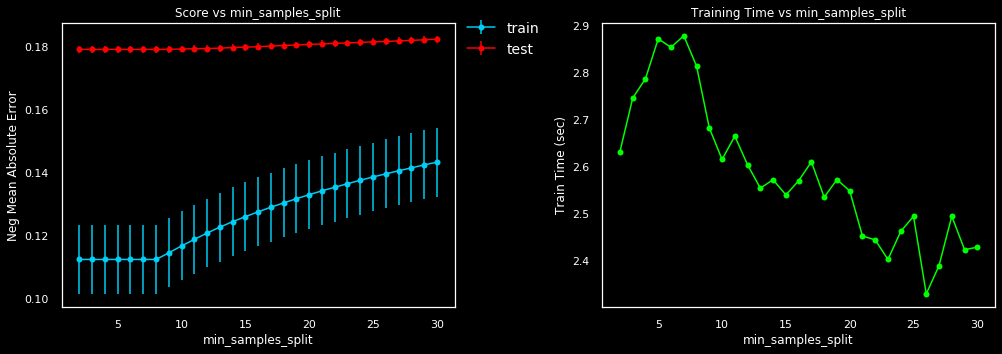


GridSearchCV Results Best n_estimators: 400 | Best RMSE: 0.177



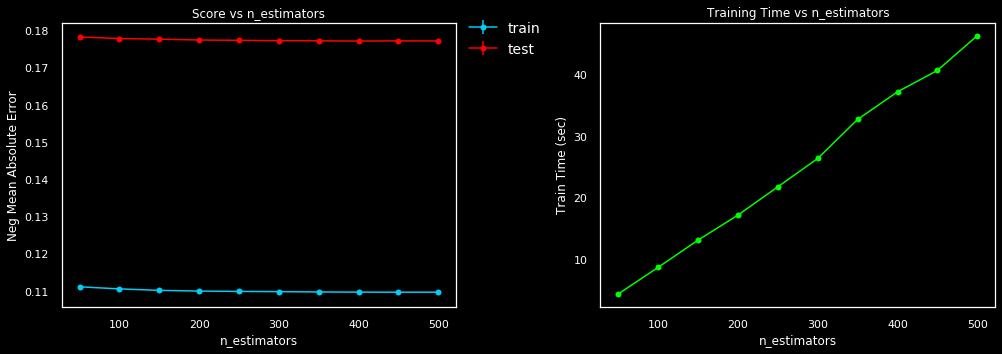


GridSearchCV Results Best min_samples_leaf: 2 | Best RMSE: 0.178



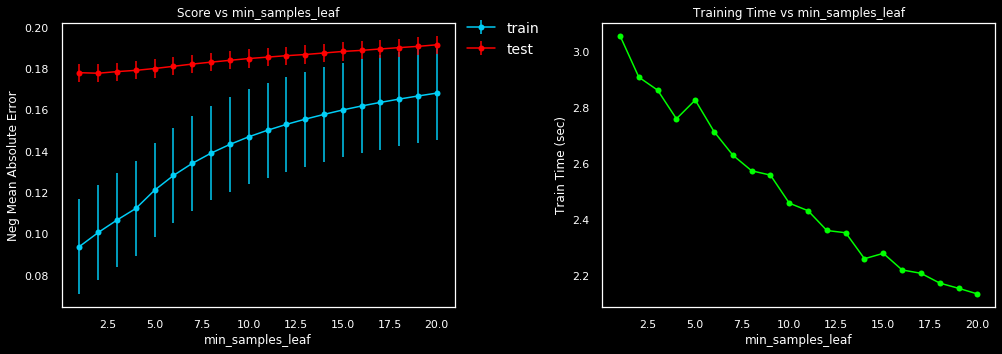


GridSearchCV Results Best max_depth: 22 | Best RMSE: 0.179



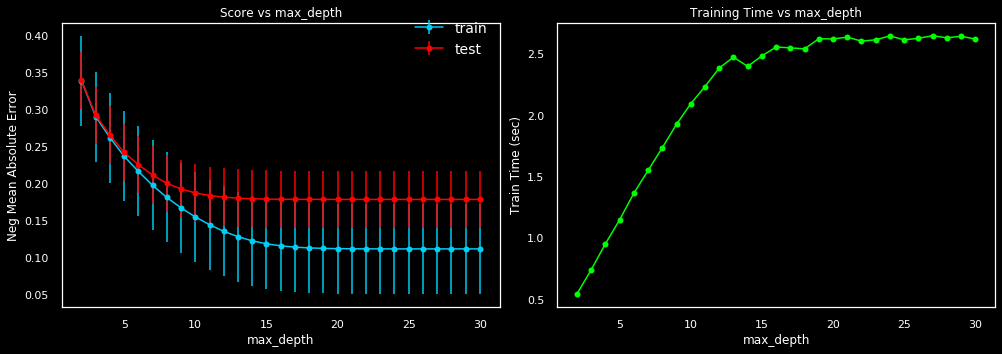

In [41]:
print(f'GridSearchCV Results Best min_samples_split: {best_k1:d} | Best RMSE: {best_score1:.3f}')
print()
plot_results(estimator1, name = 'min_samples_split', 
             param_name='param_regressor__min_samples_split')
print()
print(f'GridSearchCV Results Best n_estimators: {best_k2:d} | Best RMSE: {best_score2:.3f}')
print()
plot_results(estimator2, name = 'n_estimators', 
             param_name='param_regressor__n_estimators')
print()
print(f'GridSearchCV Results Best min_samples_leaf: {best_k3:d} | Best RMSE: {best_score3:.3f}')
print()
plot_results(estimator3, name = 'min_samples_leaf', 
             param_name='param_regressor__min_samples_leaf')
print()
print(f'GridSearchCV Results Best max_depth: {best_k4:d} | Best RMSE: {best_score4:.3f}')
print()
plot_results(estimator4, name = 'max_depth', 
             param_name='param_regressor__max_depth')

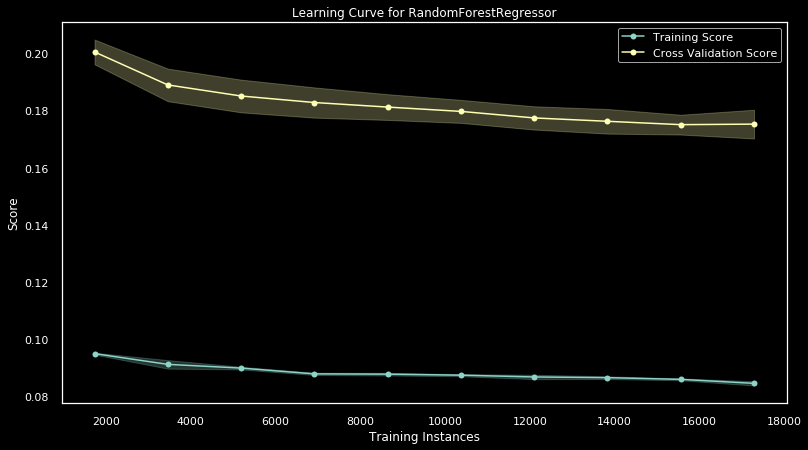

In [42]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.grid(False)
l_curve = LearningCurve(RandomForestRegressor(random_state=42, criterion='friedman_mse',
                                        max_depth=22, 
                                        min_samples_split=2,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=2, 
                                        n_estimators=400,
                                        min_weight_fraction_leaf=0.0), 
                        train_sizes=np.arange(.1, 1.01, .1),
                        scoring=rmse_score, 
                        cv=5, 
                        #n_jobs=5,
                        ax=ax)
l_curve.fit(X, y)
l_curve.poof();

In [43]:
l_curve.estimator.fit(X_train, y_train)
y_pred = l_curve.estimator.predict(X_test)

In [44]:
error = (y_test - y_pred).rename('Prediction Errors')

In [45]:
scores = dict(
    rmse=np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)),
    rmsle=np.sqrt(mean_squared_log_error(y_true=y_test, y_pred=y_pred)),
    mean_ae=mean_absolute_error(y_true=y_test, y_pred=y_pred),
    median_ae=median_absolute_error(y_true=y_test, y_pred=y_pred),
    r2score=explained_variance_score(y_true=y_test, y_pred=y_pred)
)

In [46]:
from yellowbrick.model_selection import CVScores
from sklearn.model_selection import KFold
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot

In [47]:
preds = pd.concat([pd.Series(y_test).reset_index(drop=True), pd.Series(y_pred).reset_index(drop=True)], axis=1)
preds.columns = ['price', 'predictions']
preds.head()

,price,predictions
0,13.592367,13.586827
1,13.124361,13.054864
2,13.199139,13.121227
3,13.240146,13.189153
4,12.872663,12.854419


In [48]:
# Make predictions from our model for train and test sets
train_predictions = l_curve.estimator.predict(X_train)
test_predictions = l_curve.estimator.predict(X_test)

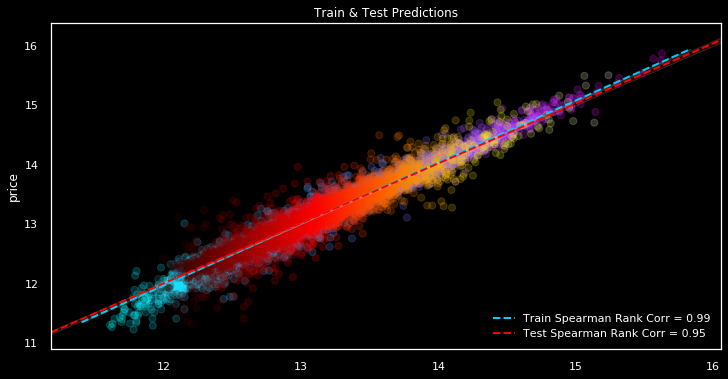

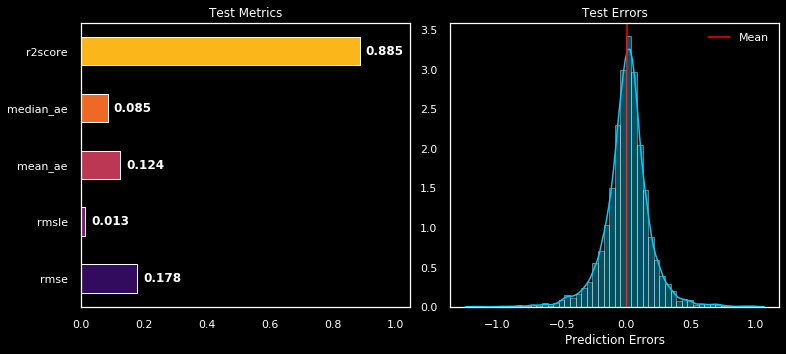

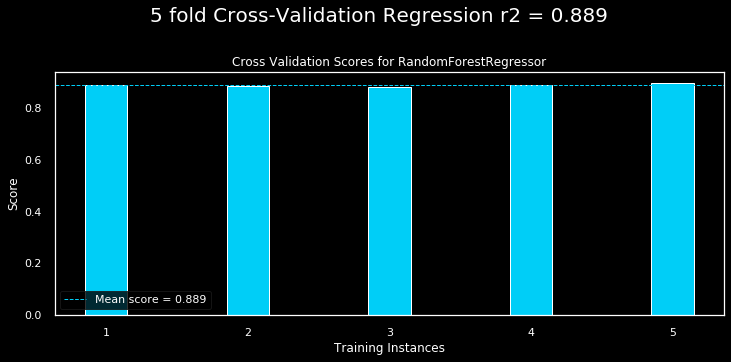

In [49]:
plt.figure(figsize=(12, 6))
plt.scatter(train_predictions, y_train, c=train_predictions, s=50, cmap="cool", alpha=0.2, label='Train')
plt.scatter(test_predictions, y_test, c=test_predictions, s=50, cmap="hot", alpha=0.2, label='Test')
sns.regplot(train_predictions, y_train, data=preds, scatter=False,
                line_kws={'color':'#00cef7','lw':2, 'linestyle':'dashed'})
sns.regplot(test_predictions, y_test, data=preds, scatter=False, 
                line_kws={'color':'red','lw':2, 'linestyle':'dashed'})
plt.grid(False)
plt.legend((f'Train Spearman Rank Corr = {round(spearmanr(train_predictions, y_train)[0],2)}', 
            f'Test Spearman Rank Corr = {round(spearmanr(test_predictions, y_test)[0],2)}'), loc='lower right')
plt.title('Train & Test Predictions')
plt.show();

fig, axes = plt.subplots(ncols=2, figsize=(11, 5)) 
model = l_curve.estimator
colors0 = sns.color_palette('inferno', 5)
pd.Series(scores).plot.barh(title='Test Metrics',colors=colors0, ax=axes[0])
for i, v in enumerate(pd.Series(scores).values):
        axes[0].text(v + 0.14, i, str(round(v,3)), color='white', fontweight='bold', fontsize=12, va='center', ha = 'right')
axes[0].grid(False)
axes[0].margins(x=0.18)
sns.distplot(error, ax=axes[1], color='#00cef7')
axes[1].axvline(error.mean(),color = 'red', lw=1.5, label='Mean')
axes[1].grid(False)
axes[1].legend()
axes[1].set_title('Test Errors')
fig.tight_layout(pad = 1)
plt.show();
    
fig, axes = plt.subplots(figsize=(12, 5)) 
axes.grid(False)
visualizer1 = CVScores(model, cv=5, scoring='r2', color='#00cef7',ax=axes)
visualizer1.fit(X, y)
visualizer1.score(X, y)
fig.suptitle(f'5 fold Cross-Validation Regression r2 = {round(visualizer1.cv_scores_mean_,3)}', fontsize=20)
plt.subplots_adjust(top=0.8)
visualizer1.show();

In [49]:
X1 = X[['lat', 'grade', 'waterfront', 'sqft_living', 'long', 'zipcode', 'view',
       'bathrooms', 'sqft_above', 'yr_built', 'sqft_living15', 'bedrooms',
       'sqft_lot15', 'condition', 'floors', 'sqft_basement', 'sqft_lot']]

X2 = X[['lat', 'grade', 'waterfront', 'sqft_living', 'long', 'zipcode', 'view',
       'bathrooms', 'sqft_above', 'yr_built', 'sqft_living15', 'bedrooms',
       'sqft_lot15', 'condition', 'floors']]

X3 = X[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]

X4 = X[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15']]

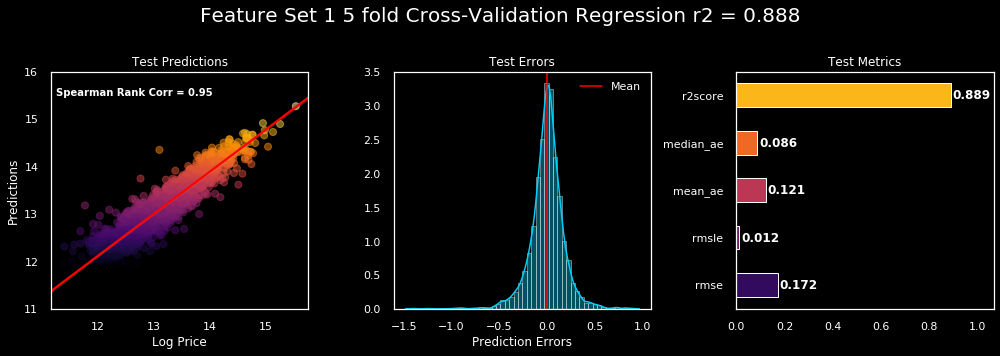

Features set 1: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15']



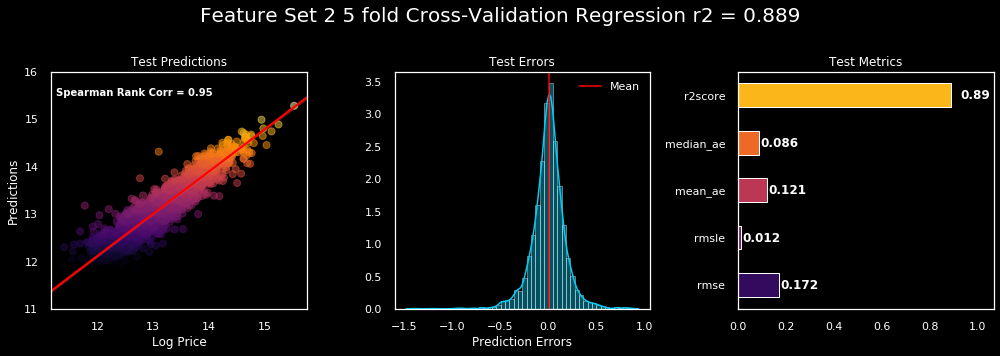

Features set 2: ['lat', 'grade', 'waterfront', 'sqft_living', 'long', 'zipcode', 'view', 'bathrooms', 'sqft_above', 'yr_built', 'sqft_living15', 'bedrooms', 'sqft_lot15', 'condition', 'floors', 'sqft_basement', 'sqft_lot']



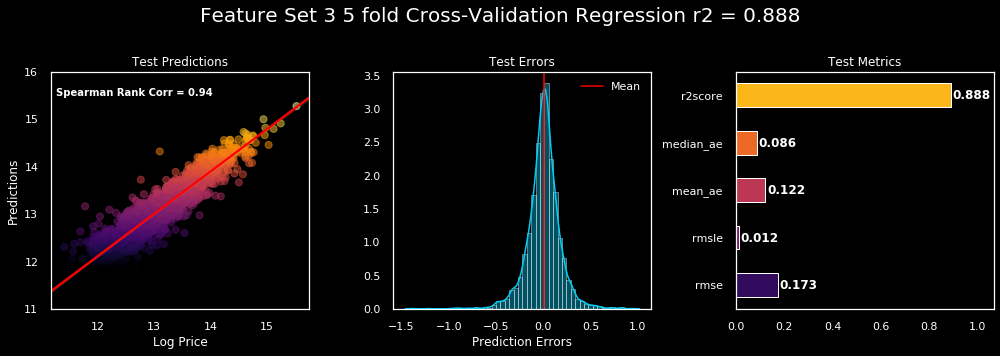

Features set 3: ['lat', 'grade', 'waterfront', 'sqft_living', 'long', 'zipcode', 'view', 'bathrooms', 'sqft_above', 'yr_built', 'sqft_living15', 'bedrooms', 'sqft_lot15', 'condition', 'floors']



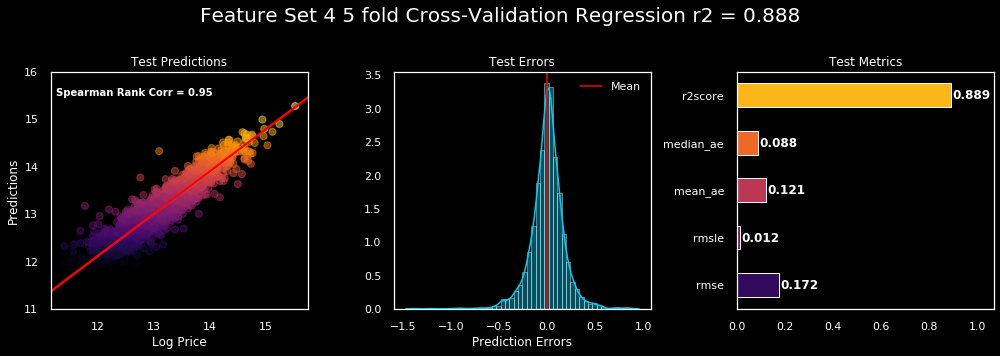

Features set 4: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']



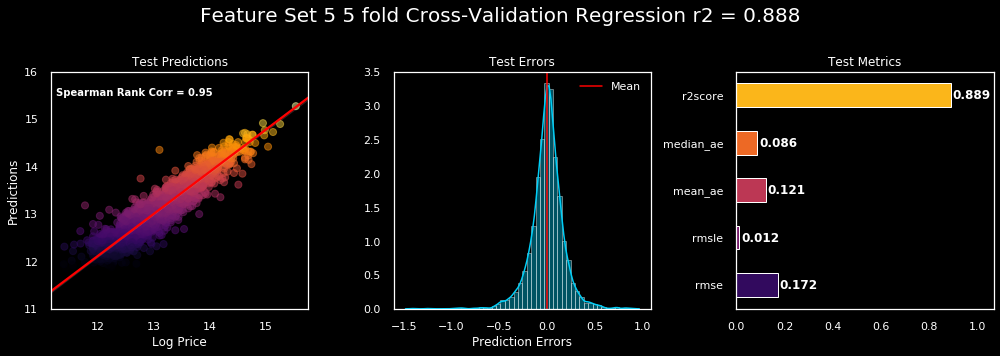

Features set 5: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15']



In [51]:
plt.style.use('dark_background')

Xs = [X, X1, X2, X3, X4]

count = 0
for X in Xs:
    count += 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
    l_curve.estimator.fit(X=X_train, y=y_train)
    y_pred = l_curve.estimator.predict(X_test)
    error = (y_test - y_pred).rename('Prediction Errors')
    
    preds = pd.concat([pd.Series(y_test).reset_index(drop=True), pd.Series(y_pred).reset_index(drop=True)], axis=1)
    preds.columns = ['price', 'predictions']
    
    scores = dict(
    rmse=np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)),
    rmsle=np.sqrt(mean_squared_log_error(y_true=y_test, y_pred=y_pred)),
    mean_ae=mean_absolute_error(y_true=y_test, y_pred=y_pred),
    median_ae=median_absolute_error(y_true=y_test, y_pred=y_pred),
    r2score=explained_variance_score(y_true=y_test, y_pred=y_pred)
    )
    
    fig, axes = plt.subplots(ncols=3, figsize=(14, 5))
    colors = sns.color_palette('inferno', 5)
    axes[0].scatter(preds.price, preds.predictions, c=preds.predictions, s=50, cmap="inferno", alpha=0.5)
    j = sns.regplot(preds.price, preds.predictions, data=preds, scatter=False, color="red", ax=axes[0])
    j.annotate(f'Spearman Rank Corr = {round(spearmanr(y_test, y_pred)[0],2)}', xy=(11.25,15.5), size=10, fontweight='bold')
    axes[0].grid(False)
    axes[0].set_xlabel('Log Price')
    axes[0].set_ylabel('Predictions')
    axes[0].set_ylim(11, 16)
    axes[0].set_title('Test Predictions')
    sns.distplot(error, ax=axes[1], color='#00cef7')
    axes[1].axvline(error.mean(),color = 'red', lw=1.5, label='Mean')
    axes[1].legend(loc='Best')
    axes[1].set_title('Test Errors')
    axes[1].grid(False)
    pd.Series(scores).plot.barh(ax=axes[2], title='Test Metrics',colors=colors)
    axes[2].grid(False)
    for i, v in enumerate(pd.Series(scores).values):
        axes[2].text(v + 0.165, i, str(round(v,3)), color='white', fontweight='bold', fontsize=12, va='center', ha = 'right')
    axes[2].margins(x=0.2)
    cv = float(format(cross_val_score(l_curve.estimator, X, y, cv=5).mean(),'.3f'))
    fig.suptitle(f'Feature Set {count} 5 fold Cross-Validation Regression r2 = {cv}', fontsize=20)
    fig.tight_layout()
    plt.grid(False)
    plt.subplots_adjust(top=.8)
    plt.show();
    
    print(f'Features set {count}:', list(X.columns))
    print()

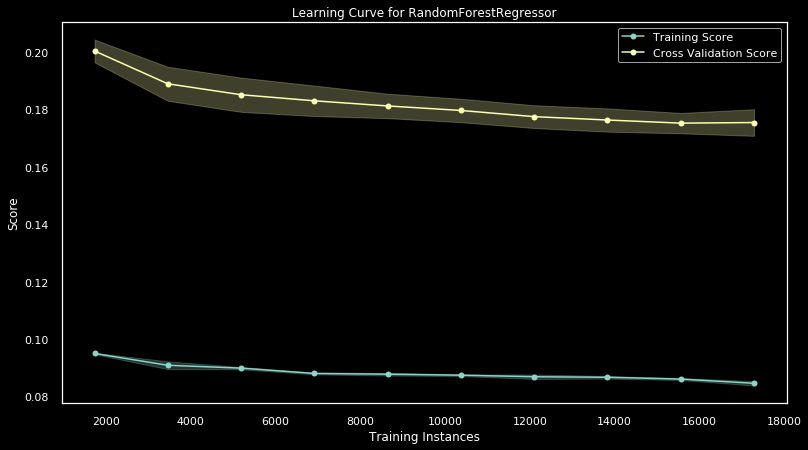

In [55]:
fig, ax = plt.subplots(figsize=(13, 7))
ax.grid(False)
l_curve = LearningCurve(RandomForestRegressor(random_state=0, criterion='friedman_mse',
                                        max_depth=22, 
                                        min_samples_split=2,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=2, 
                                        n_estimators=400,
                                        min_weight_fraction_leaf=0.0), 
                        train_sizes=np.arange(.1, 1.01, .1),
                        scoring=rmse_score, 
                        cv=5, 
                        #n_jobs=5,
                        ax=ax)
l_curve.fit(X1, y)                       
l_curve.poof()
fig.tight_layout();

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, train_size=0.8, random_state=0)

In [57]:
l_curve.estimator.fit(X_train, y_train)
y_pred = l_curve.estimator.predict(X_test)

In [58]:
error = (y_test - y_pred).rename('Prediction Errors')

In [59]:
scores = dict(
    rmse=np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)),
    rmsle=np.sqrt(mean_squared_log_error(y_true=y_test, y_pred=y_pred)),
    mean_ae=mean_absolute_error(y_true=y_test, y_pred=y_pred),
    median_ae=median_absolute_error(y_true=y_test, y_pred=y_pred),
    r2score=explained_variance_score(y_true=y_test, y_pred=y_pred)
    )

In [60]:
preds = pd.concat([pd.Series(y_test).reset_index(drop=True), pd.Series(y_pred).reset_index(drop=True)], axis=1)
preds.columns = ['price', 'predictions']
preds.head()

,price,predictions
0,12.601487,12.661750
1,14.271669,14.333706
2,13.239435,13.191837
3,13.355853,13.186699
4,13.567049,13.468557


In [61]:
# Make predictions from our model for train and test sets
train_predictions = l_curve.estimator.predict(X_train)
test_predictions = l_curve.estimator.predict(X_test)

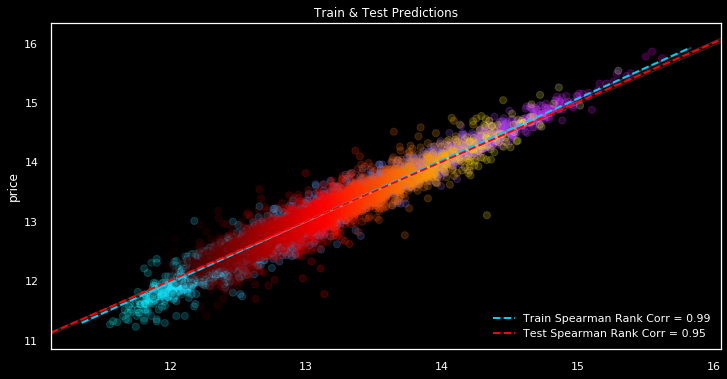

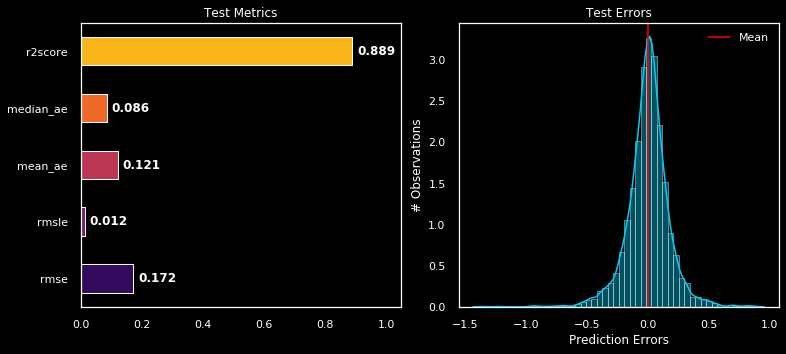

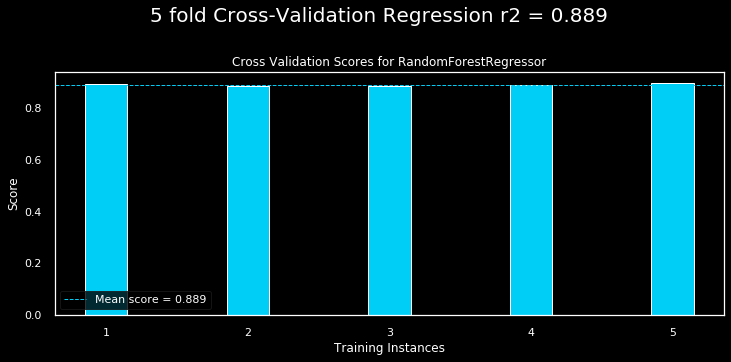

In [62]:
plt.figure(figsize=(12, 6))

plt.scatter(train_predictions, y_train, c=train_predictions, s=50, cmap="cool", alpha=0.2, label='Train')
plt.scatter(test_predictions, y_test, c=test_predictions, s=50, cmap="hot", alpha=0.2, label='Test')

sns.regplot(train_predictions, y_train, data=preds, scatter=False,
                line_kws={'color':'#00cef7','lw':2, 'linestyle':'dashed'})

sns.regplot(test_predictions, y_test, data=preds, scatter=False, 
                line_kws={'color':'red','lw':2, 'linestyle':'dashed'})

plt.grid(False)
plt.legend((f'Train Spearman Rank Corr = {round(spearmanr(train_predictions, y_train)[0],2)}', 
            f'Test Spearman Rank Corr = {round(spearmanr(test_predictions, y_test)[0],2)}'), loc='lower right')
plt.title('Train & Test Predictions')
plt.show();

fig, axes = plt.subplots(ncols=2, figsize=(11, 5)) 
model = l_curve.estimator
colors0 = sns.color_palette('inferno', 5)
pd.Series(scores).plot.barh(title='Test Metrics',colors=colors0, ax=axes[0])
for i, v in enumerate(pd.Series(scores).values):
        axes[0].text(v + 0.14, i, str(round(v,3)), color='white', fontweight='bold', fontsize=12, va='center', ha = 'right')
axes[0].grid(False)
axes[0].margins(x=0.18)
sns.distplot(error, ax=axes[1], color='#00cef7')
axes[1].axvline(error.mean(),color = 'red', lw=1.5, label='Mean')
axes[1].set_ylabel('# Observations')
axes[1].grid(False)
axes[1].legend()
axes[1].set_title('Test Errors')
fig.tight_layout(pad = 1)
plt.show();
    
fig, axes = plt.subplots(figsize=(12, 5)) 
axes.grid(False)
visualizer1 = CVScores(model, cv=5, scoring='r2', color='#00cef7',ax=axes)
visualizer1.fit(X1, y)
visualizer1.score(X1, y)
fig.suptitle(f'5 fold Cross-Validation Regression r2 = {round(visualizer1.cv_scores_mean_,3)}', fontsize=20)
plt.subplots_adjust(top=0.8)
visualizer1.show();